In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

#from sklearn.metrics import scorer

%matplotlib inline

** Explore the WineQuality data and apply the Linear Regression **

In [2]:
name = ['Quality','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash  ', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv("data/wine.data", names=name)
#print(wine.describe)
wine[:5]

,Quality,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


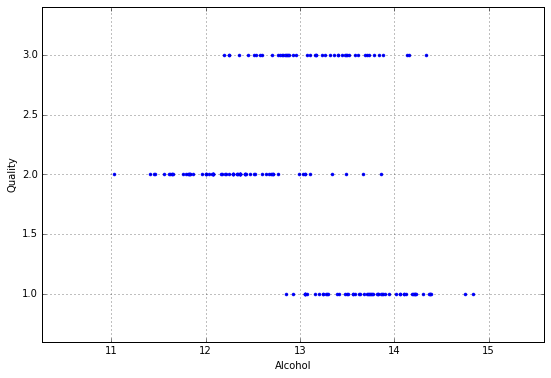

In [3]:
# plotting the data 
fig, ax = plt.subplots(figsize=(9,6))
X = wine['Alcohol']
y = wine['Quality'] 
ax.plot(X, y, 'b.')
ax.set_xlabel("Alcohol")
ax.set_ylabel("Quality")
ax.margins(0.2)
ax.grid(True)

In [4]:
lReg = LinearRegression()

X = wine[list(wine.columns)[1:]]
y = wine['Quality']

#print (X[:2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# fitting the data
lReg.fit(X_train, y_train)

# predicting 
y_pred = lReg.predict(X_test)

print('R-squared:', lReg.score(X_test, y_test))

R-squared: 0.751455073256


In [5]:
# cross validation scores
scores = cross_val_score(lReg, X_train, y_train, cv=5)
print("Scores",scores)
print("Mean Score",np.mean(scores))

Scores [ 0.94440433  0.90437523  0.87567046  0.84538339  0.82372693]
Mean Score 0.878712068801


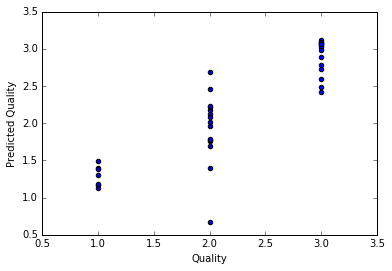

In [6]:
plt.scatter(y_test, y_pred)
plt.xlabel("Quality")
plt.ylabel("Predicted Quality")

### Fitting models with gradient descent   

There are two varieties of gradient descent that are distinguished by the number
of training instances that are used to update the model parameters in each training
iteration. Batch gradient descent, which is sometimes called only gradient descent,
uses all of the training instances to update the model parameters in each iteration.
Stochastic Gradient Descent (SGD), in contrast, updates the parameters using
only a single training instance in each iteration. The training instance is usually
selected randomly. Stochastic gradient descent is often preferred to optimize cost
functions when there are hundreds of thousands of training instances or more, as
it will converge more quickly than batch gradient descent. Batch gradient descent
is a deterministic algorithm, and will produce the same parameter values given the
same training set.

As a stochastic algorithm, SGD can produce different parameter
estimates each time it is run. SGD may not minimize the cost function as well as
gradient descent because it uses only single training instances to update the weights.
Its approximation is often close enough, particularly for convex cost functions such
as residual sum of squares.

In [7]:
boston = load_boston()

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=27)

# 
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)


regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print ('Cross validation r-squared scores:', scores)
print ('Average cross validation r-squared score:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print ('Test set r-squared score', regressor.score(X_test, y_test))

Cross validation r-squared scores: [ 0.62320303  0.69227473  0.65868536  0.82229171  0.73979355]
Average cross validation r-squared score: 0.707249675037
Test set r-squared score 0.663820750408


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta